# Customer Segmentation using K-Means

 Internship Project - Data Analytics

**Step 1: Dataset Loading & Overview**

In [ ]:
import pandas as pd
df= pd.read_csv("ifood_df.csv")
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


**Step 2: Data Cleaning & Feature Selection**

In [ ]:
df.shape

(2205, 39)

In [ ]:
df.columns
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [ ]:
df.isnull().sum().sort_values(ascending=False)

,0
Income,0
Kidhome,0
Teenhome,0
Recency,0
MntWines,0
MntFruits,0
MntMeatProducts,0
MntFishProducts,0
MntSweetProducts,0
MntGoldProds,0


In [ ]:
features = df[[
    'Income','Recency','MntTotal','NumWebPurchases','NumCatalogPurchases','NumStorePurchases','NumWebVisitsMonth'
]]
features.head()

,Income,Recency,MntTotal,NumWebPurchases,NumCatalogPurchases,NumStorePurchases,NumWebVisitsMonth
0,58138.0,58,1529,8,10,4,7
1,46344.0,38,21,1,1,2,5
2,71613.0,26,734,8,2,10,4
3,26646.0,26,48,2,0,4,6
4,58293.0,94,407,5,3,6,5


In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

**Step 3: Finding Optimal Clusters (Elbow Method)**

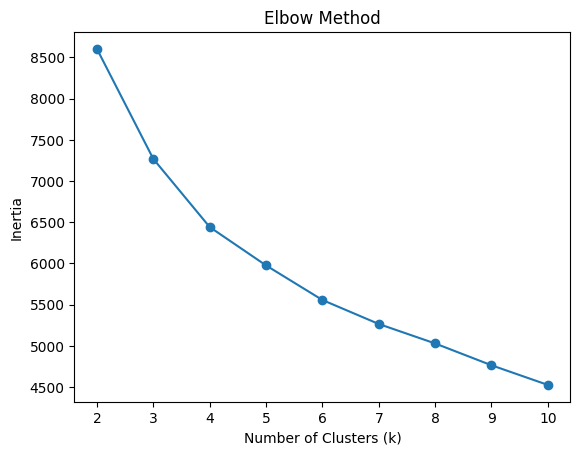

In [ ]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

inertia = []

for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(scaled_features)
    inertia.append(kmeans.inertia_)

plt.plot(range(2, 11), inertia, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

Based on the elbow method, **k = 4** was selected as the optimal number of clusters
because the inertia reduction becomes marginal beyond this point.

**Step 4: Customer Segmentation using K-Means**

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, random_state=42)
clusters = kmeans.fit_predict(scaled_features)

df['Cluster'] = clusters
df[['Income','MntTotal','NumStorePurchases','Cluster']].head()

,Income,MntTotal,NumStorePurchases,Cluster
0,58138.0,1529,4,0
1,46344.0,21,2,2
2,71613.0,734,10,1
3,26646.0,48,4,2
4,58293.0,407,6,3


In [ ]:
cluster_summary = df.groupby('Cluster')[[
    'Income','MntTotal','NumWebPurchases','NumStorePurchases','NumCatalogPurchases'
]].mean()
cluster_summary


,Income,MntTotal,NumWebPurchases,NumStorePurchases,NumCatalogPurchases
Cluster,,,,,
0,76318.598131,1303.555140,4.702804,8.493458,6.222430
1,60244.606762,770.003559,7.064057,8.081851,3.176157
2,34075.339823,90.171681,2.210619,3.288496,0.578761
3,36622.896869,110.138122,2.406998,3.493554,0.721915


**Step 5: Final Customer Segments Visualization**

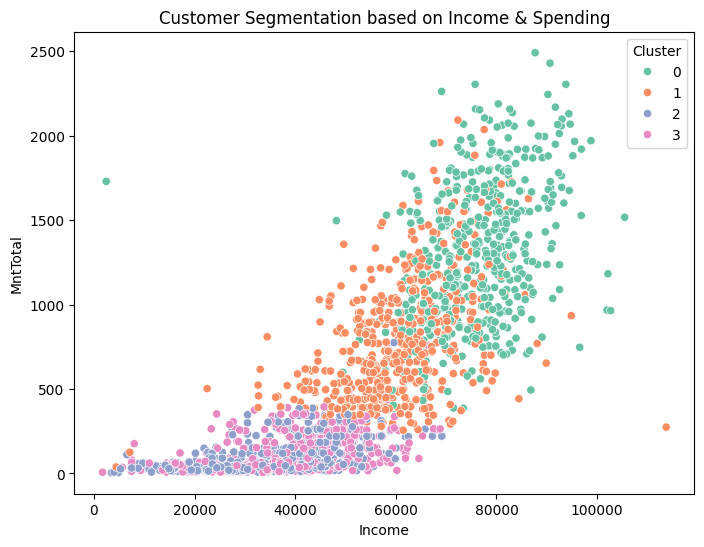

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
sns.scatterplot(data=df,
                x=df['Income'],
                y=df['MntTotal'],
                hue=df['Cluster'],
                palette='Set2'
                )
plt.title('Customer Segmentation based on Income & Spending')
plt.show()

**# Cluster Interpretation and Customer Segments**

Based on the clustering results and visualization, the customer segments can be interpreted as follows:

- Cluster 0 – Premium Customers:  
  High-income, high-spending customers who contribute significantly to total revenue.

- Cluster 1 – Regular Buyers:  
  Medium-income customers with consistent purchasing behavior.

- Cluster 2 – Low-Value Customers:  
  Low-income, low-spending customers with minimal purchase activity.

- Cluster 3 – Occasional Buyers:  
  Customers who make infrequent purchases and show irregular buying patterns.

# Conclusion

Using K-Means clustering, customers were segmented into 4 groups based on
income and spending behavior. The analysis identified high-value customers,
regular buyers, and low-spending segments. This segmentation can help
businesses design targeted marketing strategies and improve customer retention.